## Part 1: the perceptron algorithm
The perceptron algorithm produces an affine transformation of the input and squashes it into a binary loss function $\sigma(x) = \mathbb{I}\{x>0\}$. The weights are updated using a fixed learning rate $\eta$. No gradient w.r.t. the parameters is calculated, only a 

In [21]:
import numpy as np
class Perceptron:
    """Perceptron classifier"""

    def __init__(self, eta=0.01, n_iter=50, random_state=1) -> None:
        self.eta = eta 
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """Fit training data. 

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        y : {array-like}, shape = [n_examples]
        """
        rgen = np.random.RandomState(seed=self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = float(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0 
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update*xi 
                self.b_ += update 
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self 
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_ 

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [15]:
import os 
import pandas as pd 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Flower']
df.tail()

,Sepal length,Sepal width,Petal length,Petal width,Flower
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
y=df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, [0, 2]].values

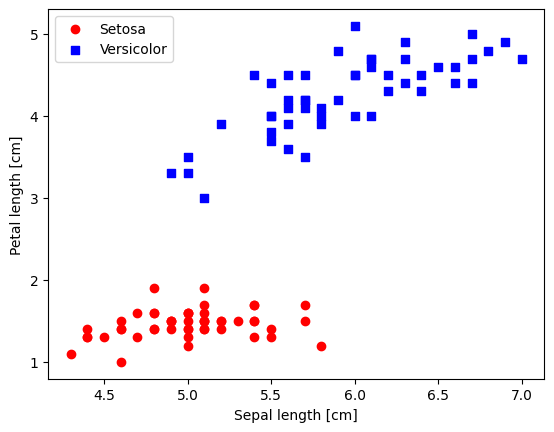

In [17]:
import matplotlib.pyplot as plt 
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:, 0], X[50:,1], color="blue", marker='s', label='Versicolor')
plt.xlabel("Sepal length [cm]")
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

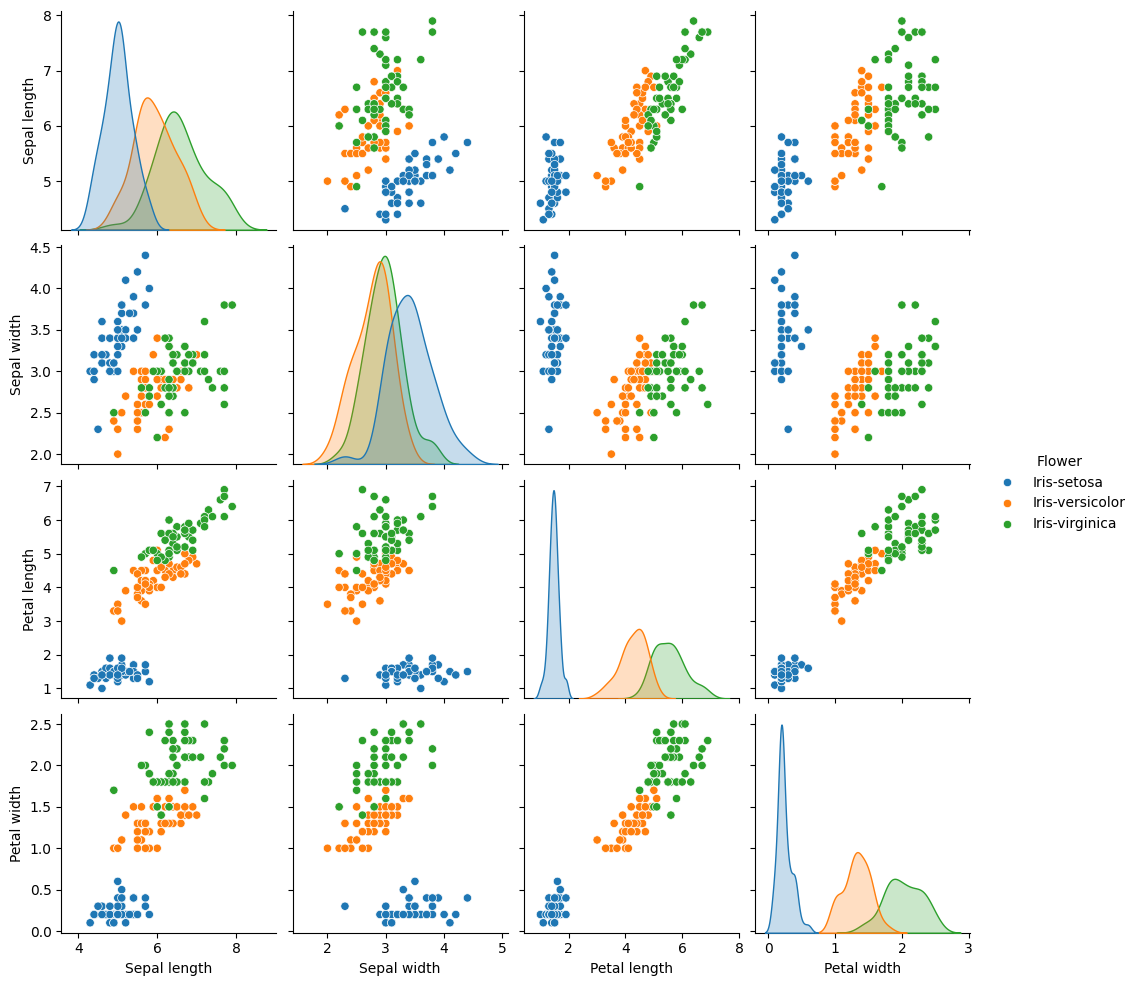

In [19]:
import seaborn as sns 
sns.pairplot(data=df, hue="Flower");

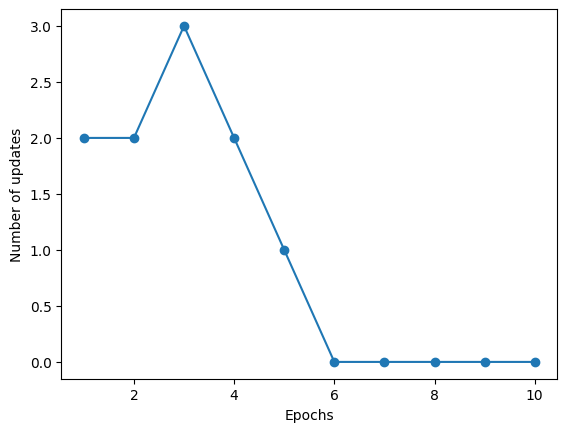

In [22]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

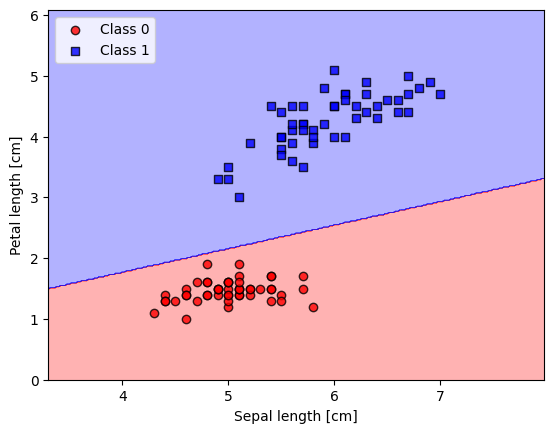

In [24]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('o', 's', '^', '<', '>')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0],
                    y=X[y == c1, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {c1}', 
                    edgecolor="black")
plot_decision_regions(X, y, ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()
